# FIR Delay Effect


## Importing Libraries


In [100]:
##Scipy functions
import scipy.io.wavfile as wv
from scipy.ndimage import shift
from IPython.display import Audio

##Others
import numpy as np
import os
import matplotlib.pyplot as plt

# Main


## Import .wav file as signal


In [101]:
DATA_FOLDER_PATH = "../Data" #Specify Data folder directory here
FILENAME = "string_1.wav" #Specify file name here


filepath = os.path.join(DATA_FOLDER_PATH, FILENAME)

In [102]:
sampleFreq, audio = wv.read(filepath) #reading audio signal here

In [103]:
sampleLen = len(audio)/sampleFreq
print(f"Sound is {sampleLen}s long")

Sound is 5.38702947845805s long


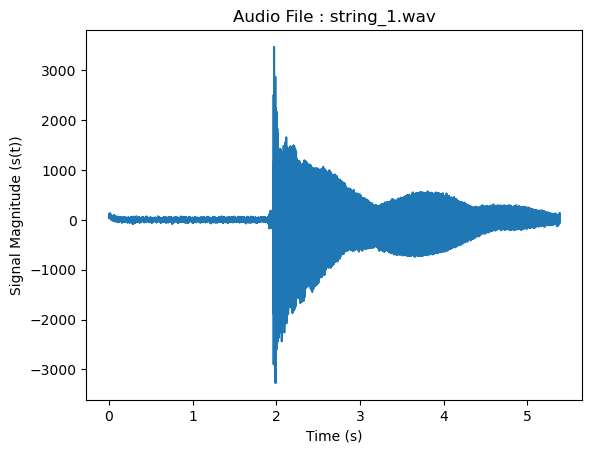

In [104]:
timeX = np.arange(0, sampleLen, 1/sampleFreq)

plt.plot(timeX, audio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}")

plt.show()

In [105]:
Audio(audio, rate=sampleFreq)

## FIR Filter


In [106]:
attenuationFactor = 0.5
timeDelay = len(audio) / 20

In [107]:
FIRDelayedAudio = audio + attenuationFactor * shift(audio, timeDelay)

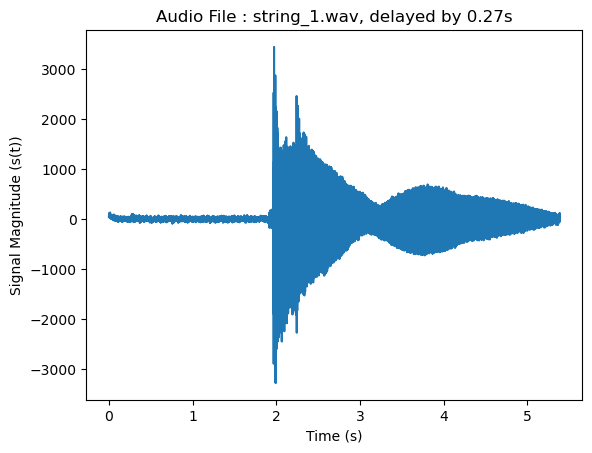

In [108]:
plt.plot(timeX, FIRDelayedAudio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")

plt.show()

In [109]:
Audio(FIRDelayedAudio, rate=sampleFreq)

In [ ]:
#H = 1 en 0, alpha en timeDelay


## IIR Filter


In [110]:
scalingFactor = 1.2
attenuationFactor = 0.8
timeDelay = len(audio) / 20

In [114]:
IIRDelayedAudio = scalingFactor * audio
IIRDelayedAudio += attenuationFactor * shift(IIRDelayedAudio, timeDelay)

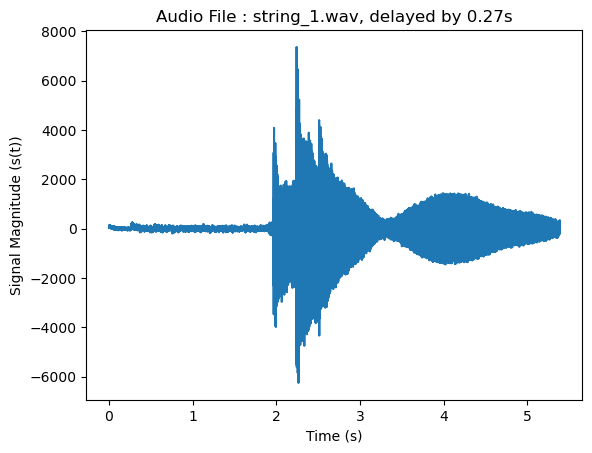

In [112]:
plt.plot(timeX, IIRDelayedAudio)
plt.xlabel("Time (s)")
plt.ylabel("Signal Magnitude (s(t))")
plt.title(f"Audio File : {FILENAME}, delayed by {timeDelay / sampleFreq:.2f}s")

plt.show()

In [113]:
Audio(IIRDelayedAudio, rate=sampleFreq)